# Лабораторная работа 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import plotly.express as px
from sklearn.impute import SimpleImputer



In [2]:

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
draw_missing(df).round(1)

,Total,Percent
bmi,201,3.9
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0


In [6]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 5110


# Обработка пропусков в числовых данных

In [7]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc)
             
             
             )

Колонка bmi. Тип данных float64. Количество пустых значений 201, 3.93%.


In [8]:
# Фильтр по колонкам с пропущенными значениями
data_num = df[num_cols]
data_num

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,NaN
5106,40.0
5107,30.6
5108,25.6


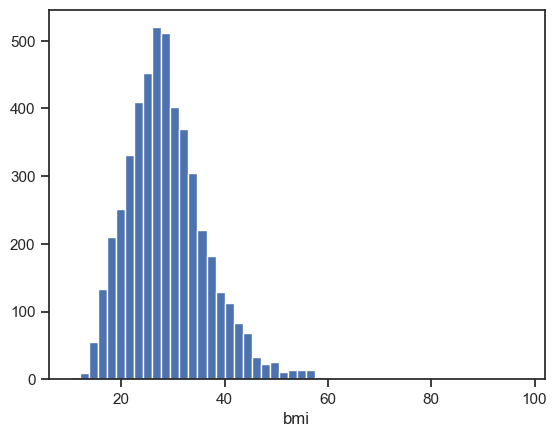

In [9]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [10]:
data_num_bmi = data_num[['bmi']]
data_num_bmi.head()

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [12]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_bmi)
mask_missing_values_only

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [14]:
strategies=['mean', 'median', 'most_frequent']

In [17]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    df["bmi"] = imp_num.fit_transform(df[['bmi']])

In [18]:
test_num_impute(strategies[1])

Проверим, что пропусков нет

In [19]:
draw_missing(df).round(1)

,Total,Percent
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0


# Преобразование категориальных признаков в числовые

## Использование LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(df['work_type'])

In [24]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [25]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4])

## Кодирование категорий наборами бинарных значений

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
cat_enc= df[['work_type']]

In [27]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(df[['work_type']])

In [30]:
cat_enc_ohe.shape

(5110, 5)

In [31]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [35]:
cat_enc.head(10)

,work_type
0,Private
1,Self-employed
2,Private
3,Private
4,Self-employed
5,Private
6,Private
7,Private
8,Private
9,Private


In [36]:
pd.get_dummies(cat_enc).head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


## Нормализация числовых признаков

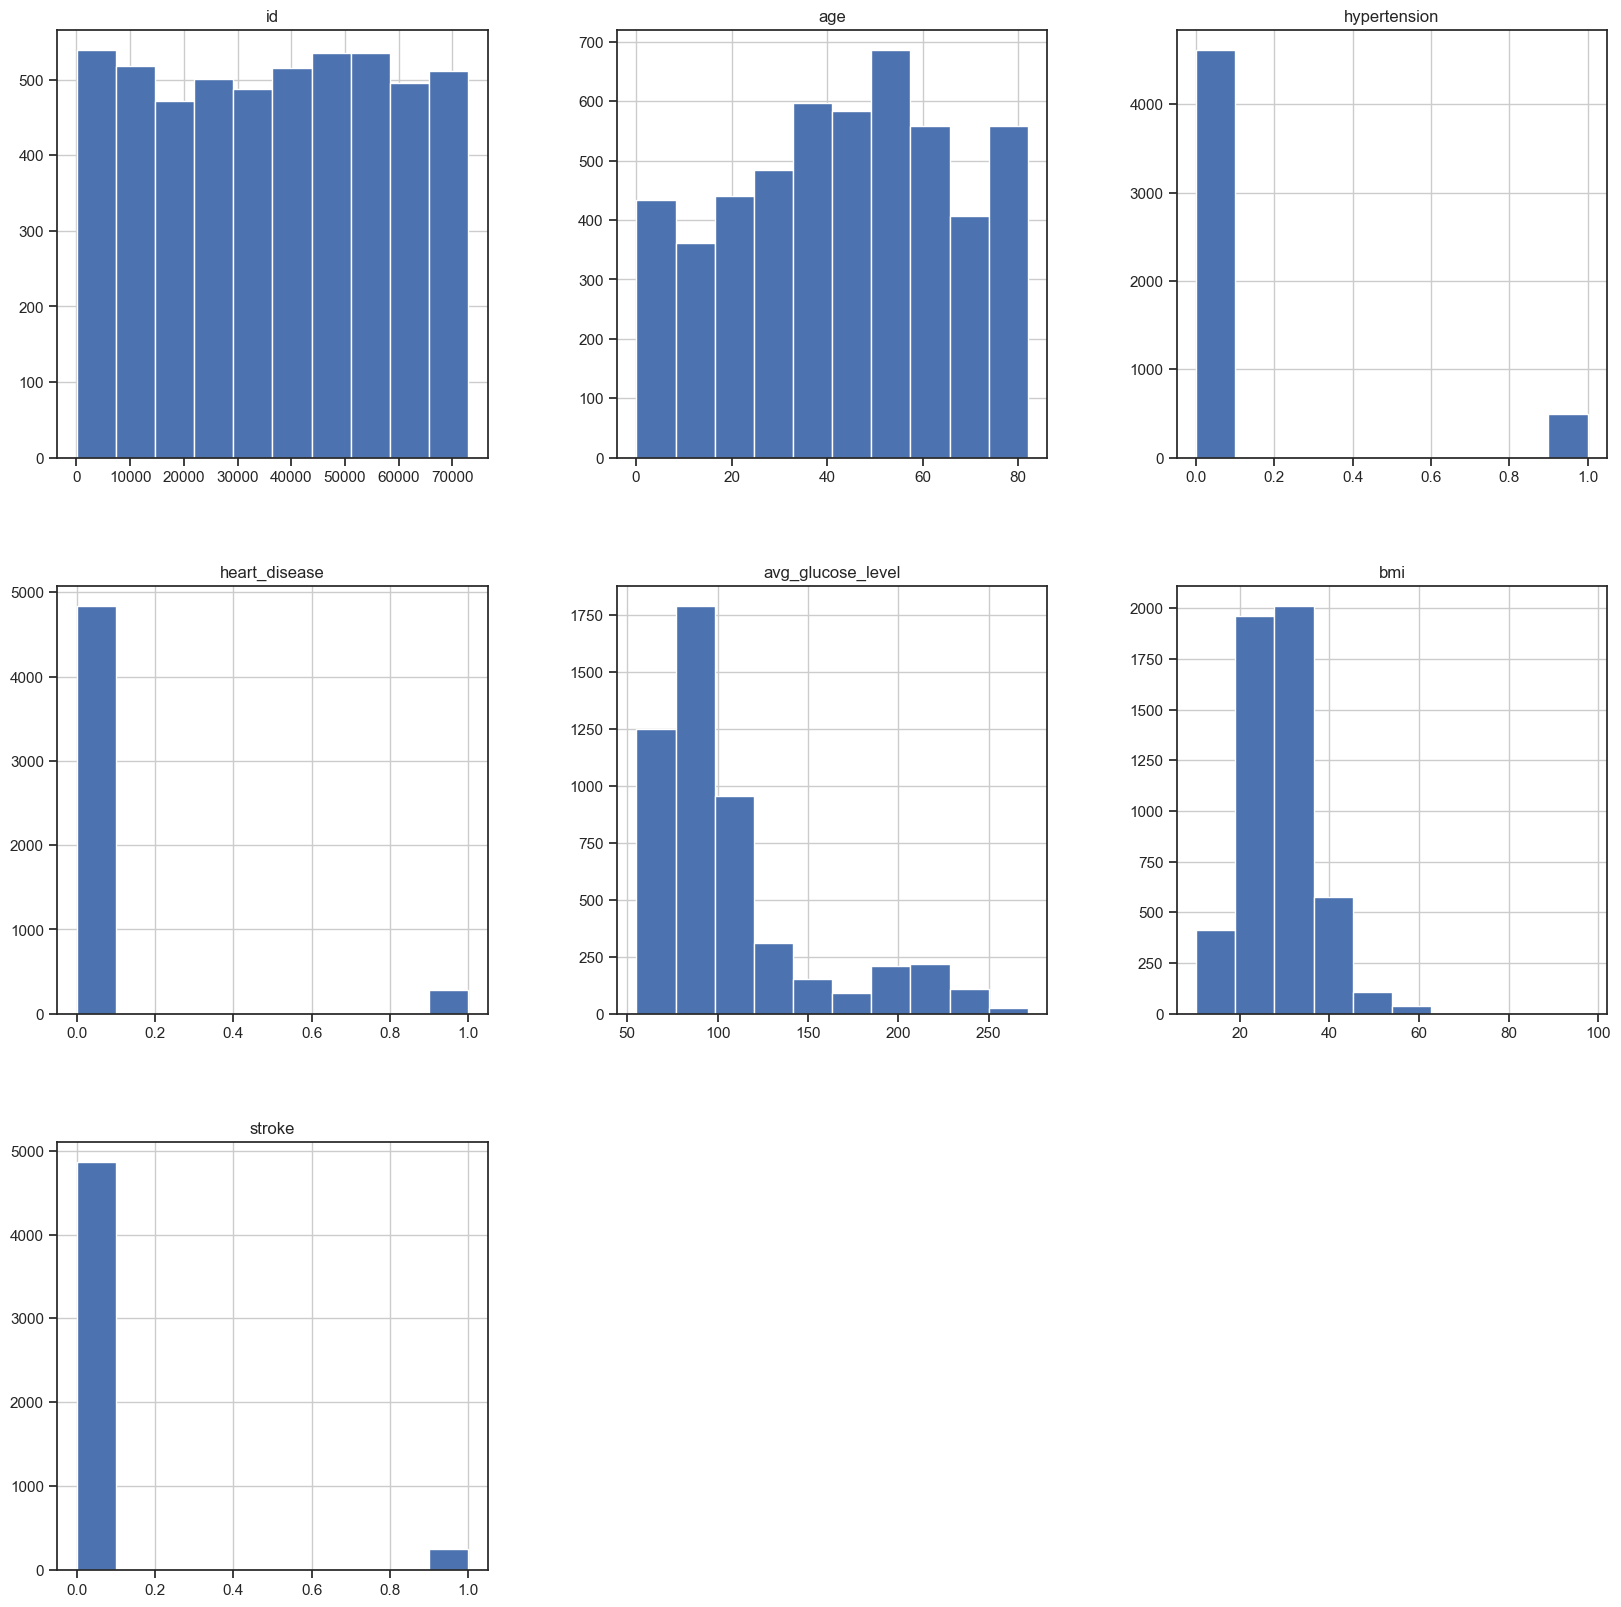

In [38]:
df.hist(figsize=(20,20))
plt.show()

In [41]:
import scipy.stats as stats

In [42]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

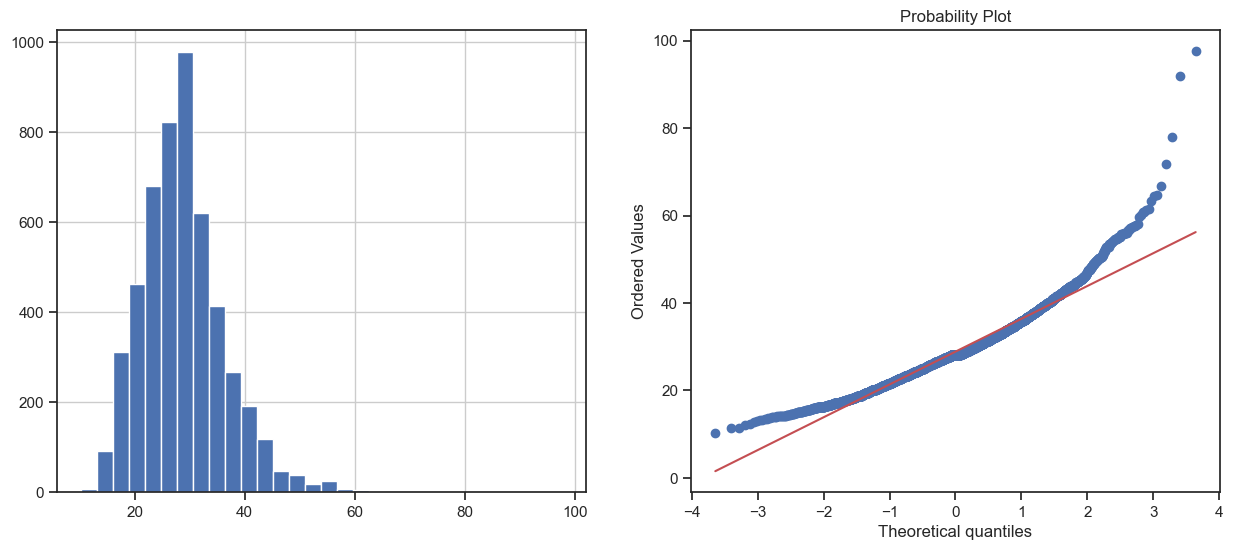

In [43]:
diagnostic_plots(df, 'bmi')

Оптимальное значение λ = 0.002446014555873693


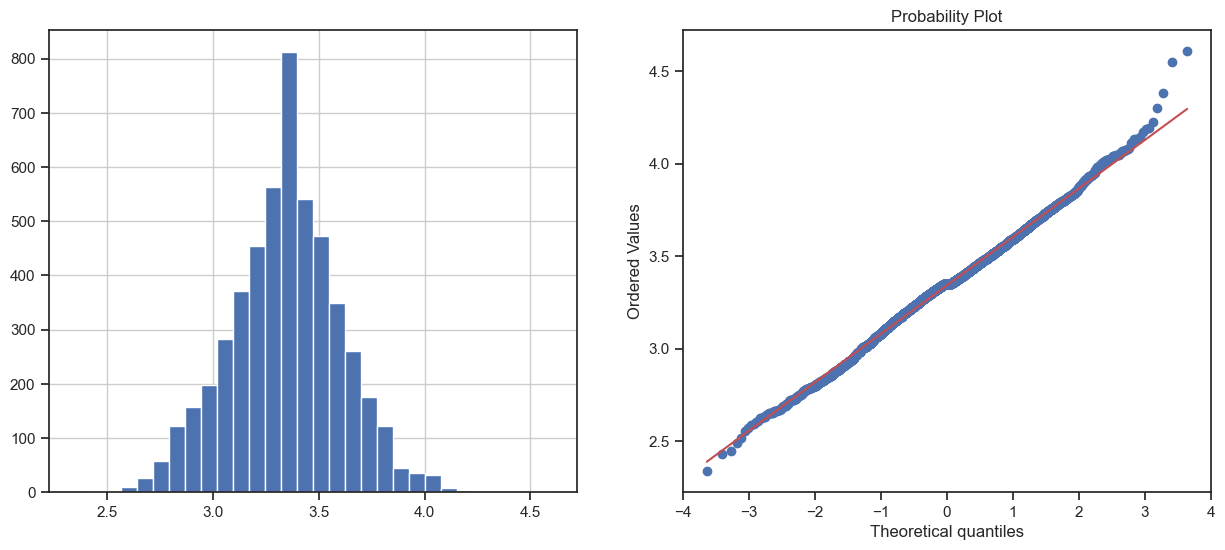

In [45]:
df['bmi_boxcox'], param = stats.boxcox(df['bmi']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'bmi_boxcox')